In [3]:
import os
from keras import layers
from keras import models
from keras import optimizers


# fill this part
from keras.preprocessing.image import ImageDataGenerator



base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=80,
      width_shift_range=0.4,
      height_shift_range=0.4,
      shear_range=0.9,
      zoom_range=0.6,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='reflect'
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=32,
        class_mode='categorical')


Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.


In [ ]:
conv_base.summary()
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(150, 150, 3))


In [ ]:
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

In [4]:
from keras.applications import VGG16
from keras import regularizers
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(300, 300, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(4, activation='softmax'))

for layer in conv_base.layers[:15]:
    layer.trainable = False
#for i, layer in enumerate(conv_base.layers):
#    print(i, layer.name, layer.trainable)
#model.summary()
model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.RMSprop(lr=0.001),
              optimizer=optimizers.adam(lr=0.0001),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      #steps_per_epoch=60,
      epochs=100,
      validation_data=validation_generator,
      #validation_steps=4
)


Epoch 1/100
53/53 [==============================] - 54s 1s/step - loss: 2.9297 - acc: 0.5212 - val_loss: 1.6091 - val_acc: 0.8455
Epoch 2/100
53/53 [==============================] - 46s 876ms/step - loss: 1.7763 - acc: 0.7110 - val_loss: 1.1252 - val_acc: 0.8395
Epoch 3/100
53/53 [==============================] - 44s 831ms/step - loss: 1.3569 - acc: 0.7713 - val_loss: 1.1186 - val_acc: 0.9054
Epoch 4/100
53/53 [==============================] - 59s 1s/step - loss: 1.1926 - acc: 0.7940 - val_loss: 0.6454 - val_acc: 0.9126
Epoch 5/100
53/53 [==============================] - 48s 907ms/step - loss: 1.0874 - acc: 0.7922 - val_loss: 0.5888 - val_acc: 0.9198
Epoch 6/100
53/53 [==============================] - 50s 947ms/step - loss: 0.9142 - acc: 0.8394 - val_loss: 0.9337 - val_acc: 0.8970
Epoch 7/100
53/53 [==============================] - 56s 1s/step - loss: 0.8546 - acc: 0.8281 - val_loss: 0.4347 - val_acc: 0.9365
Epoch 8/100
53/53 [==============================] - 48s 907ms/step - l

Epoch 62/100
53/53 [==============================] - 46s 869ms/step - loss: 0.1652 - acc: 0.9564 - val_loss: 0.0473 - val_acc: 0.9880
Epoch 63/100
53/53 [==============================] - 46s 877ms/step - loss: 0.2049 - acc: 0.9373 - val_loss: 0.0467 - val_acc: 0.9844
Epoch 64/100
53/53 [==============================] - 48s 904ms/step - loss: 0.1823 - acc: 0.9463 - val_loss: 0.0479 - val_acc: 0.9880
Epoch 65/100
53/53 [==============================] - 48s 909ms/step - loss: 0.1760 - acc: 0.9546 - val_loss: 0.0460 - val_acc: 0.9880
Epoch 66/100
53/53 [==============================] - 48s 903ms/step - loss: 0.1877 - acc: 0.9391 - val_loss: 0.0452 - val_acc: 0.9928
Epoch 67/100
53/53 [==============================] - 47s 884ms/step - loss: 0.1768 - acc: 0.9564 - val_loss: 0.0443 - val_acc: 0.9868
Epoch 68/100
53/53 [==============================] - 48s 910ms/step - loss: 0.1605 - acc: 0.9552 - val_loss: 0.0439 - val_acc: 0.9904
Epoch 69/100
53/53 [==============================] - 4

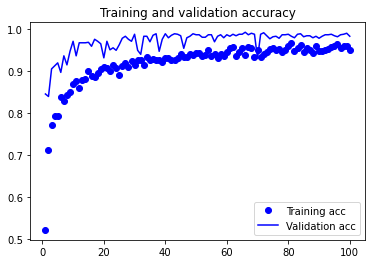

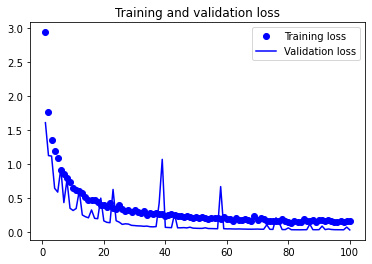

Found 200 images belonging to 4 classes.
test accuracy: 99.00%


In [5]:
model.save('modelQ5.try9') #important do not change the name of the model

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

import numpy as np
test_dir= os.path.join(base_dir, 'test') # very important: do not change this!



datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
        test_dir, 
        target_size=(300, 300), 
        batch_size=32, 
        class_mode='categorical')

loss , acc = model.evaluate_generator(generator=test_generator)
print("test accuracy: {:5.2f}%".format(100*acc))

Found 200 images belonging to 4 classes.
20/20 [==============================] - 1s 57ms/step


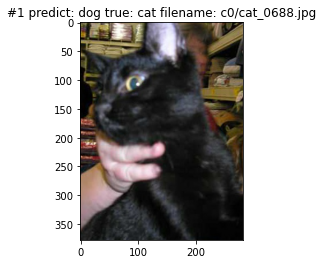

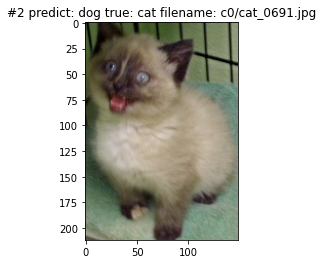

failed  2


In [9]:
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
        test_dir, 
        target_size=(300, 300), 
        batch_size=10, 
        class_mode='categorical', shuffle=False)

#loss , acc = model.evaluate_generator(generator=test_generator, verbose=1)
#test_generator.reset()
pred = model.predict_generator(generator=test_generator, verbose=1)


predicted_class_indices = np.argmax(pred, axis=1)
#print("predicted_class_indices ", predicted_class_indices)
labels = (test_generator.class_indices)
#print(labels)
label = dict((v,k) for k,v in labels.items())
predictions = [label[i] for i in predicted_class_indices]

filenames = test_generator.filenames

label_to_class_name = {
    'c0' : 'cat',
    'c1' : 'dog',
    'c2' : 'car',
    'c3' : 'motorbike'
}
count = 0
for idx in range(len(filenames )):
    y_hat = predictions[idx]
    y = filenames[idx].split('/')[0]
    if y_hat != y:
        count += 1
        title = '#' + str(count) + ' predict: ' + label_to_class_name[y_hat] + ' true: ' + label_to_class_name[y] + ' filename: ' + filenames[idx]
        
        fig = plt.figure(figsize=(4,4))
        image = mpimg.imread('cat_dog_car_bike/test/' + filenames[idx])
        #fig.add_subplot(count, 1, count)
        plt.title(title)
        plt.imshow(image)
        plt.show()        
print('failed ', count)
#test_sets = test_generator.next()
#for test in test_sets:
#    output = conv_base.predict(test)
    #print(output.shape)
    #result = model.predict(output)
    #print(result[0])

Found 835 images belonging to 4 classes.
27/27 [==============================] - 5s 181ms/step


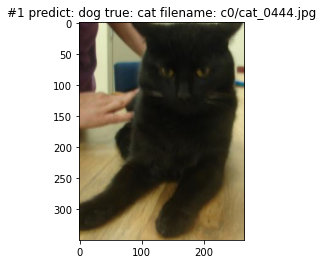

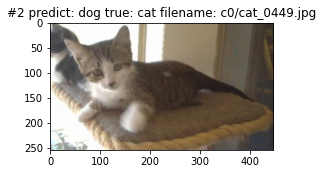

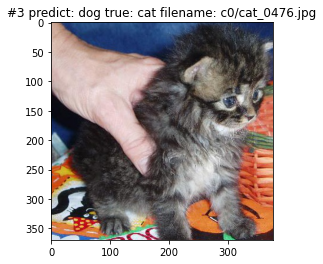

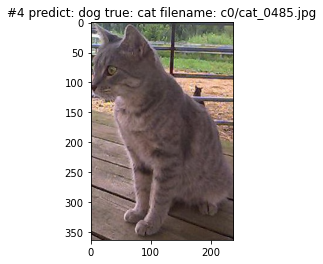

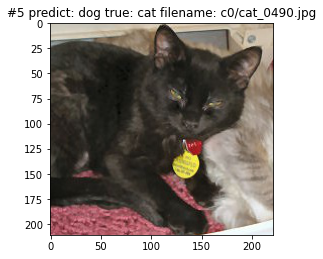

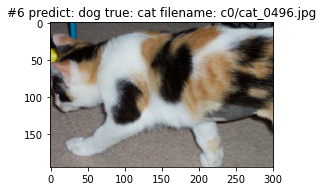

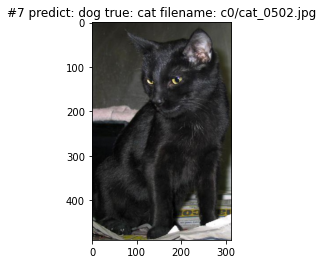

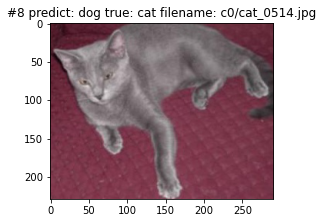

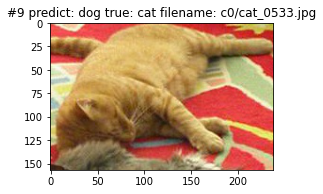

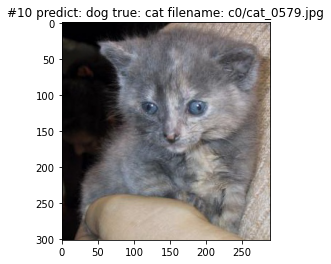

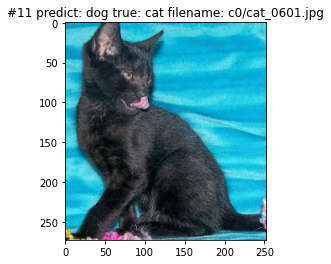

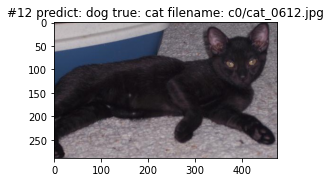

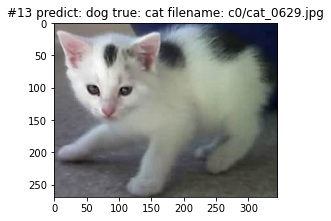

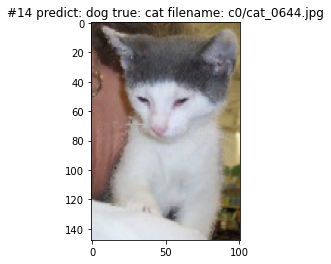

failed  14


In [7]:
datagen = ImageDataGenerator(rescale=1./255)

validation_generator = datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=32,
        class_mode='categorical', shuffle=False)

#loss , acc = model.evaluate_generator(generator=test_generator, verbose=1)
#test_generator.reset()
pred = model.predict_generator(generator=validation_generator, verbose=1)


predicted_class_indices = np.argmax(pred, axis=1)
#print("predicted_class_indices ", predicted_class_indices)
labels = (validation_generator.class_indices)
#print(labels)
label = dict((v,k) for k,v in labels.items())
predictions = [label[i] for i in predicted_class_indices]

filenames = validation_generator.filenames

label_to_class_name = {
    'c0' : 'cat',
    'c1' : 'dog',
    'c2' : 'car',
    'c3' : 'motorbike'
}


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display
import time

count = 0


for idx in range(len(filenames )):
    y_hat = predictions[idx]
    y = filenames[idx].split('/')[0]
    
    if y_hat != y:
        count += 1
        title = '#' + str(count) + ' predict: ' + label_to_class_name[y_hat] + ' true: ' + label_to_class_name[y] + ' filename: ' + filenames[idx]
        
        fig = plt.figure(figsize=(4,4))
        image = mpimg.imread('cat_dog_car_bike/val/' + filenames[idx])
        #fig.add_subplot(count, 1, count)
        plt.title(title)
        plt.imshow(image)
        plt.show()
        
print('failed ', count)

